<b><h1><big> <center> Customer Churn Prediction </b></big></center>


<h2> This project aims to predict whether a customer will churn, or leave the company, based on their past behavior. This information can be used to identify customers who are at risk of churning and take action to prevent them from leaving, Customer churn is a major problem for many businesses. It can lead to lost revenue, increased costs, and a decline in customer satisfaction. This project can help businesses to identify and prevent customer churn, which can save them money and improve their bottom line.


<h3><b><big>  Project Objectives:</b> </h1>
<h5><b><big>  Exploratory Data Analysis</b> </h1>

+ <b>Imports Packages
+ Read the data
+ Understanding the data
+ Features Description
+ Analysis and Visualization Data
+  Questions to give more precise insights into the data and the relationship between the data. </b>

  1. How many customers have churned?
  2. How does gender influence customer churn?
  3. Does being a senior citizen affect customer churn?
  4.  How does the tenure of a customer affect churn?
  5. How does the internet service provider affect customer churn?
  6. Does the presence of online security impact customer churn?
  7. How does device protection influence customer churn?
  
  8. Does the availability of tech support impact customer churn?
  9. Does the contract term affect customer churn?
  10. What is the distribution of different payment methods among churned customers?  

<h4><b><big> Data Modeling  </h1>

+ Label encoding
+ Handle outliers
+ Feature Scaling
+ Correlation
+ Featuer Selection
+ Building Machine learning model
   + LazyClassifier
   + Random Forest Classifier
   +Lazy Classifier

<h4><b><big> Conclusion   </h1>






<h1><b><big> Exploratory Data Analysis</b> </h1>

- <B><h3>Imports Packages</B></h4>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

- <B><h3>Read the data</B></h4>

In [123]:
# The data from Kaggle
data = pd.read_excel('/content/data.xlsx')

- <B><h3>Understanding the data </B></h4>

From this code we can see:
+ The dataset contains 22 columns.
+ The dataset contains 7,043 rows.
+ There are no null values in the dataset.
+  Data types for each column.


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<p><b> Features Description </p> </b>

- customerID: Customer ID
- genderCustomer: gender (female, male)
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- PartnerWhether: the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- numAdminTickets: The number of Admin Ticket
- numTechTickets: The number of Tech Ticket
- Churn: Whether the customer churned or not (Yes or No)

In [125]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


 - describe() function provides a tabular summary of the statistics for each numerical column in the Data set.

In [126]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75
numAdminTickets,7043.00,0.52,1.28,0.00,0.00,0.00,0.00,5.00
numTechTickets,7043.00,0.42,1.25,0.00,0.00,0.00,0.00,9.00


- This show number of columns and rows in dataset .

In [127]:
data.shape

(7043, 23)

- checks for duplicate rows in a dataset .

In [128]:
data.duplicated().sum()

0

- removes the column named 'customerID' from the Dataset , Because its not important.

In [129]:
data = data.drop('customerID', axis=1)

- <B><h3>Analysis and Visualization Data </B></h4>

- From this code we acn see :
1. Analyzes the 'gender' column and creates a pie chart showing that the male rate is 50.5% higher than the female rate.
2. Analyzes the 'Senior Citizen' column and creates a pie chart showing that the Senior Citizen rate is 83.8% higher than the Not a senior citizen rate.
3. Analyzes the 'Partner' column and creates a pie chart showing that the majority of customers do not have a partner.
4. Analyzes the 'Dependents' column and creates a pie chart showing that the majority of customers do not have a dependent.

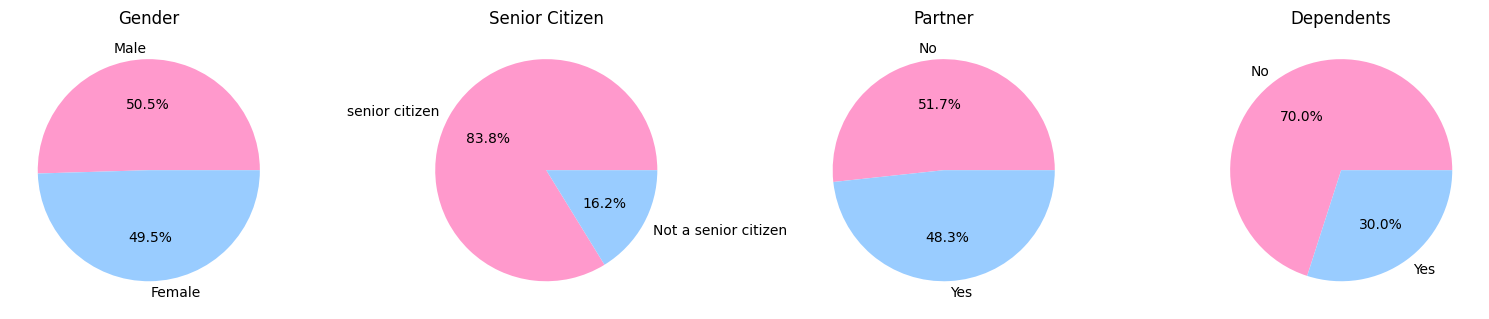

In [130]:
replacement = {0: 'senior citizen', 1: 'Not a senior citizen'}
data['SeniorCitizen'] = data['SeniorCitizen'].replace(replacement)

gender_counts = data['gender'].value_counts()
senior_citizen_counts = data['SeniorCitizen'].value_counts()
partner_counts = data['Partner'].value_counts()
dependents_counts = data['Dependents'].value_counts()

variables = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']
value_counts = [gender_counts, senior_citizen_counts, partner_counts, dependents_counts]

fig, axs = plt.subplots(1, 4, figsize=(15, 8))
axs = axs.flatten()

colors = ['#ff99cc', '#99ccff']
for i, (variable, value_count) in enumerate(zip(variables, value_counts)):
    labels = value_count.index
    counts = value_count.values
    axs[i].pie(counts, labels=labels, autopct='%1.1f%%', colors=colors)
    axs[i].set_title(variable)

plt.tight_layout()
plt.show()


- This code show the number of months each customer has spent with the company and creates a histogram and KDE plot to show the distribution.
- The average months that the customer spends with the company is approximately 32 months.

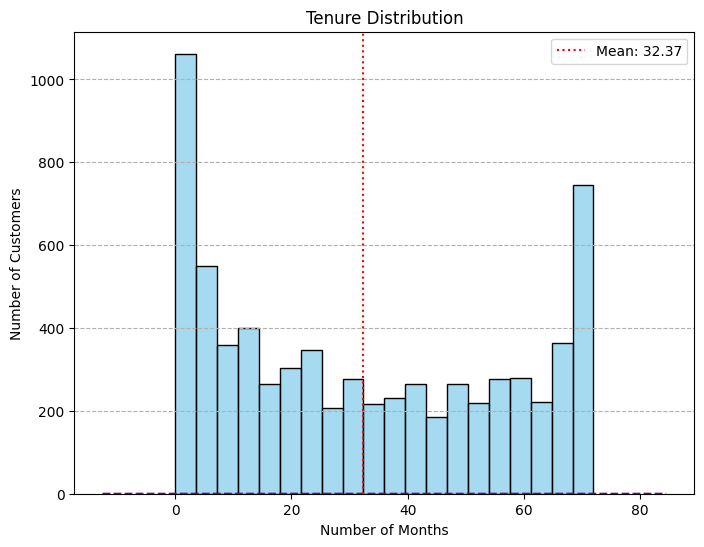

In [131]:
tenure_data = data['tenure']
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(tenure_data, bins=20, kde=False, color='skyblue', edgecolor='black', ax=ax)
ax.set_xlabel('Number of Months')
ax.set_ylabel('Number of Customers')
ax.set_title('Tenure Distribution')

sns.kdeplot(tenure_data, color='purple', linestyle='--', ax=ax)
mean = tenure_data.mean()
ax.axvline(mean, color='red', linestyle=':', label=f'Mean: {mean:.2f}')
ax.legend()

ax.grid(axis='y', linestyle='--')
plt.show()


- provides a count of the number of customers who have and do not have phone service.

In [132]:
data['PhoneService'].value_counts().to_frame()

,PhoneService
Yes,6361
No,682


- Represents the value counts for the 'MultipleLines' column.

In [133]:
data['MultipleLines'].value_counts().to_frame()

,MultipleLines
No,3390
Yes,2971
No phone service,682


- Represent the distribution of internet service providers among the customers. Each slice of the pie chart corresponds to a unique internet service provider category, and its size represents the proportion of customers using that particular service.
- We note that most of the internet subscriptions are fiber optics , with 44% .

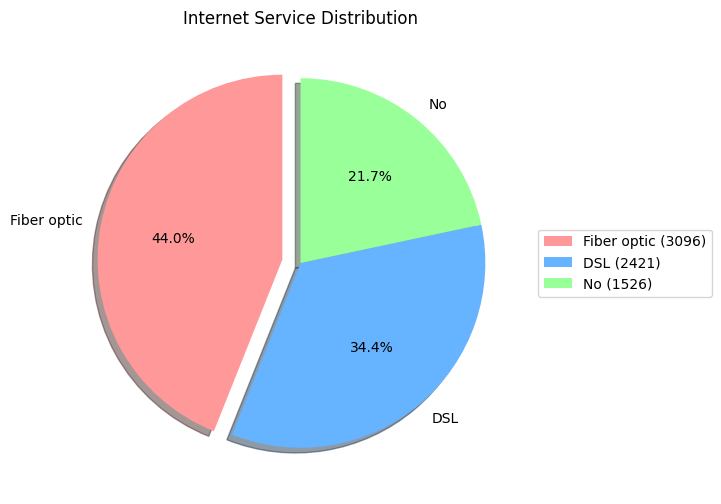

In [134]:
InternetService_count = data['InternetService'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(InternetService_count, labels=InternetService_count.index, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=90)
plt.title("Internet Service Distribution")
# Add legend with count information
legend_labels = [f"{label} ({count})" for label, count in zip(InternetService_count.index, InternetService_count)]
plt.legend(labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


- The plot will show four bar charts, each representing the count of different options within the 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', and 'TechSupport' columns. The x-axis will display the options, the y-axis will represent the count of customers.

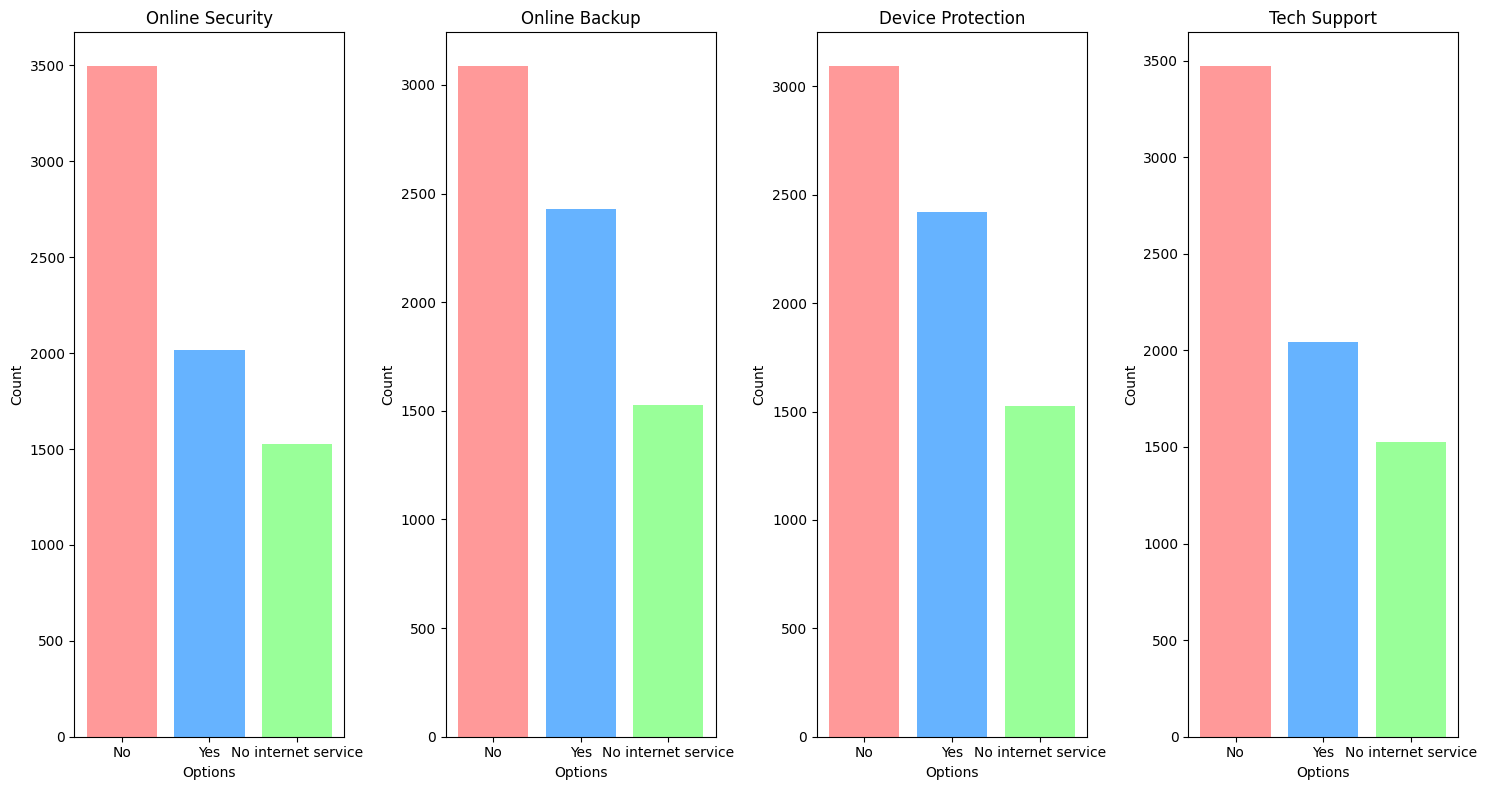

In [135]:
OnlineSecurity_counts = data['OnlineSecurity'].value_counts()
OnlineBackup_counts = data['OnlineBackup'].value_counts()
DeviceProtection_counts = data['DeviceProtection'].value_counts()
TechSupport_counts = data['TechSupport'].value_counts()

variables = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support']
value_counts = [OnlineSecurity_counts, OnlineBackup_counts, DeviceProtection_counts, TechSupport_counts]

fig, axs = plt.subplots(1, 4, figsize=(15, 8))
axs = axs.flatten()
colors = ['#ff9999', '#66b3ff', '#99ff99']

for i, (variable, value_count) in enumerate(zip(variables, value_counts)):
    labels = value_count.index
    counts = value_count.values

    axs[i].bar(labels, counts, color=colors)
    axs[i].set_xlabel('Options')
    axs[i].set_ylabel('Count')
    axs[i].set_title(variable)

plt.tight_layout()
plt.show()

- Represent the count of each contract type in the 'Contract' column.

In [136]:
data['Contract'].value_counts().to_frame()

,Contract
Month-to-month,3875
Two year,1695
One year,1473


- Representing the distribution of payment methods among customers, with each segment representing a payment method, the percentage, and the number of customers using that method.

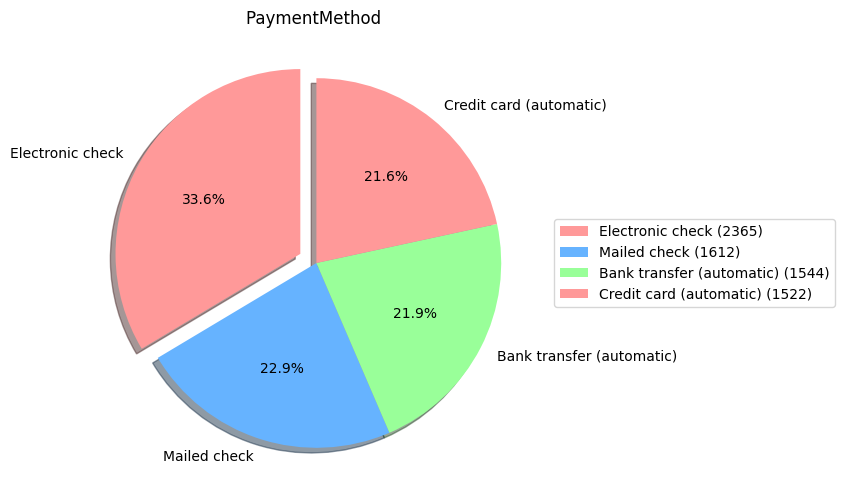

In [137]:
PaymentMethod_count = data['PaymentMethod'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(PaymentMethod_count, labels=PaymentMethod_count.index, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=90)
plt.title("PaymentMethod ")
# Add legend with count information
legend_labels = [f"{label} ({count})" for label, count in zip(PaymentMethod_count.index, PaymentMethod_count)]
plt.legend(labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


- This code calculates the descriptive statistics for the 'MonthlyCharges' column , And  answer this  questions:
1. What is the maximum amount a customer paid for monthly charges?
2. What is the minimum amount a customer paid for monthly charges?
3. What is the mean (average) of the monthly charges?

In [138]:
data['MonthlyCharges'].describe().to_frame()

,MonthlyCharges
count,7043.00
mean,64.76
std,30.09
min,18.25
25%,35.50
50%,70.35
75%,89.85
max,118.75


- Customer churn, also known as customer attrition, is when someone chooses to stop using your products or services.

In [139]:
data['Churn'].value_counts().to_frame()

,Churn
No,5174
Yes,1869


In [140]:
churn_rate = data['Churn'].value_counts(normalize=True)['Yes']
print(f"The churn rate is: {churn_rate:.2%}")


The churn rate is: 26.54%


- <b> There are some questions here to give more precise insights into the data and the relationship between the data.

1. How many customers have churned?




In [141]:
churned_count = data[data['Churn'] == 'Yes'].shape[0]
print("Number of customers who have churned:", churned_count)

Number of customers who have churned: 1869


2. How does gender influence customer churn?

In [142]:
data[['Churn','gender']].value_counts().to_frame()

0
Churn gender      
No    Male    2625
      Female  2549
Yes   Female   939
      Male     930

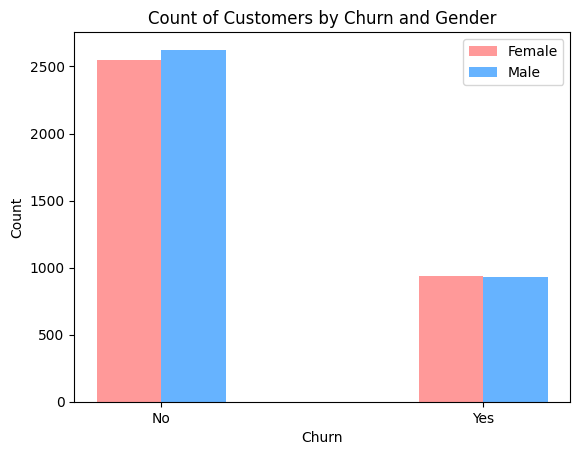

In [143]:
churn_gender_counts = data[['Churn', 'gender']].value_counts().to_frame().unstack()
churn_labels = churn_gender_counts.index.get_level_values('Churn')
gender_labels = churn_gender_counts.columns.get_level_values('gender')
counts = churn_gender_counts.values.flatten()
fig, ax = plt.subplots()
x = np.arange(len(churn_labels))
bar_width = 0.2

for i, gender in enumerate(gender_labels):
    ax.bar(x + i * bar_width, counts[i::len(gender_labels)], bar_width, label=gender, color=colors[i])

ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Count of Customers by Churn and Gender')
ax.set_xticks(x + (len(gender_labels) - 1) * bar_width / 2)
ax.set_xticklabels(churn_labels)
ax.legend()
plt.show()

3. Does being a senior citizen affect customer churn?

In [144]:
# Create a contingency table of churn by senior citizen status
contingency_table = pd.crosstab(data["Churn"], data["SeniorCitizen"])
contingency_table

SeniorCitizen,Not a senior citizen,senior citizen
Churn,,
No,666,4508
Yes,476,1393


<Figure size 800x600 with 0 Axes>

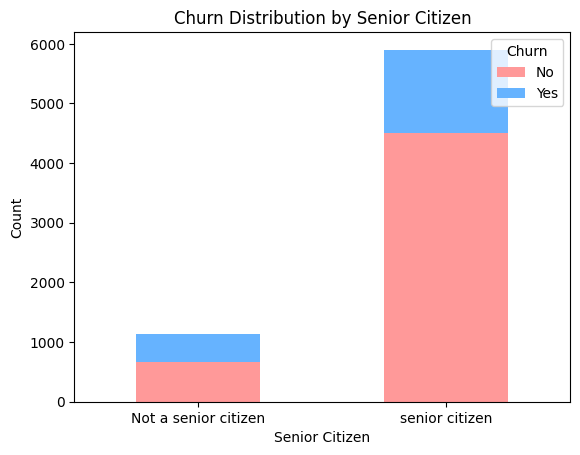

In [145]:
churn_senior_counts = data.groupby('SeniorCitizen')['Churn'].value_counts().unstack()
colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(8, 6))
churn_senior_counts.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Churn Distribution by Senior Citizen')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.show()


4. How does the tenure of a customer affect churn?

In [146]:
churn_counts = data['Churn'].value_counts()
churn_rate = churn_counts['Yes'] / churn_counts.sum() * 100
print("Churn Counts:\n", churn_counts)


Churn Counts:
 No     5174
Yes    1869
Name: Churn, dtype: int64


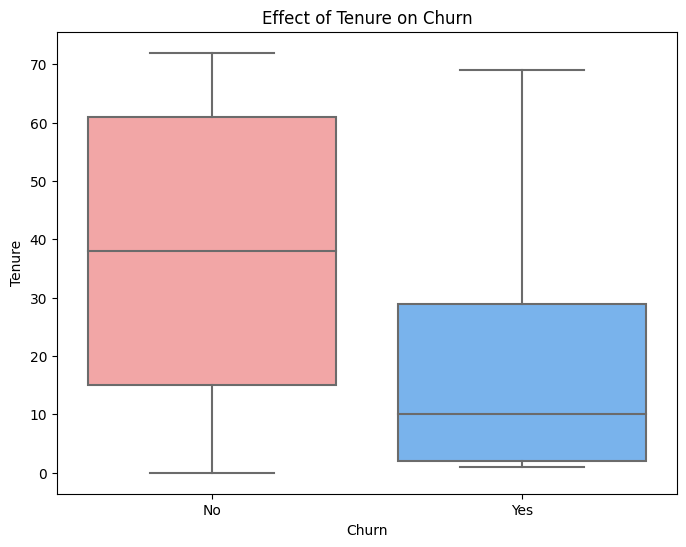

In [147]:
# Calculate the upper bound and lower bound for outliers
q1 = data['tenure'].quantile(0.25)
q3 = data['tenure'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers from the dataset
data = data[(data['tenure'] >= lower_bound) & (data['tenure'] <= upper_bound)]

churned_tenure = data[data['Churn'] == 'Yes']['tenure']
non_churned_tenure = data[data['Churn'] == 'No']['tenure']

colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Churn'], y=data['tenure'], palette=colors, showfliers=False)
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Effect of Tenure on Churn')
plt.show()


- These graphics represent the answer to these questions:

5. How does the internet service provider affect customer churn?
6. Does the presence of online security impact customer churn?

7. How does device protection influence customer churn?

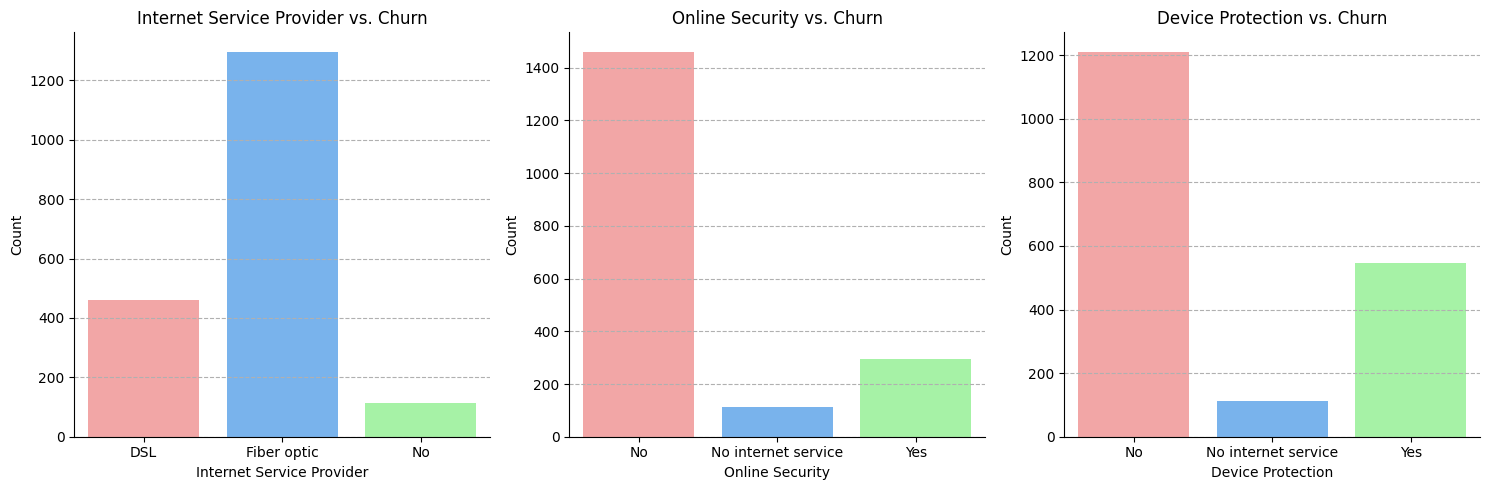

In [148]:
# Define the data for each question
isp_churn_counts = data.groupby(['InternetService', 'Churn']).size().unstack()
security_churn_counts = data.groupby(['OnlineSecurity', 'Churn']).size().unstack()
device_churn_counts = data.groupby(['DeviceProtection', 'Churn']).size().unstack()

colors = ['#ff9999', '#66b3ff', '#99ff99']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# How does the internet service provider affect customer churn? : Internet Service Provider vs. Churn
sns.barplot(x=isp_churn_counts.index, y='Yes', data=isp_churn_counts, palette=colors, ax=axs[0])
axs[0].set_xlabel('Internet Service Provider')
axs[0].set_ylabel('Count')
axs[0].set_title('Internet Service Provider vs. Churn')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].grid(axis='y', linestyle='--')

# Does the presence of online security impact customer churn? : Online Security vs. Churn
sns.barplot(x=security_churn_counts.index, y='Yes', data=security_churn_counts, palette=colors, ax=axs[1])
axs[1].set_xlabel('Online Security')
axs[1].set_ylabel('Count')
axs[1].set_title('Online Security vs. Churn')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].grid(axis='y', linestyle='--')

# How does device protection influence customer churn? : Device Protection vs. Churn
sns.barplot(x=device_churn_counts.index, y='Yes', data=device_churn_counts, palette=colors, ax=axs[2])
axs[2].set_xlabel('Device Protection')
axs[2].set_ylabel('Count')
axs[2].set_title('Device Protection vs. Churn')
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


- These graphics represent the answer to these questions:

8. Does the availability of tech support impact customer churn?
9. Does the contract term affect customer churn?
10. What is the distribution of different payment methods among churned customers?

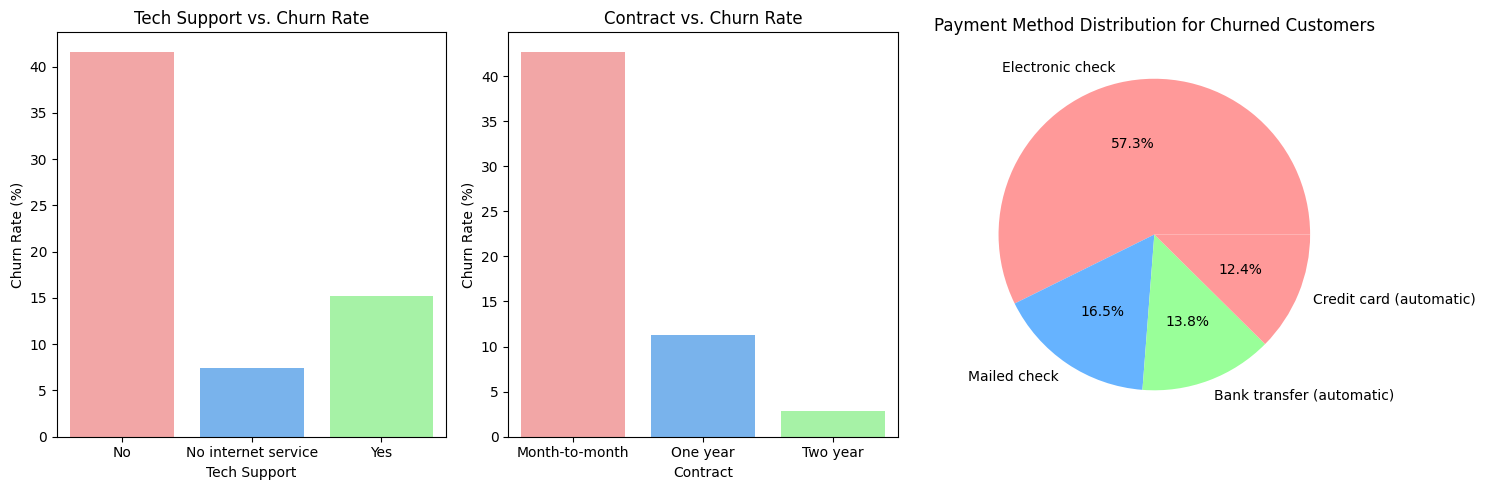

In [149]:
tech_support_churn_counts = data.groupby(['TechSupport', 'Churn']).size().unstack()
contract_churn_counts = data.groupby(['Contract', 'Churn']).size().unstack()
tech_support_churn_rate = tech_support_churn_counts['Yes'] / (tech_support_churn_counts.sum(axis=1))

# Calculate churn rate for Contract
contract_churn_rate = contract_churn_counts['Yes'] / (contract_churn_counts.sum(axis=1))

# Group data by PaymentMethod for churned customers
payment_method_counts = data[data['Churn'] == 'Yes']['PaymentMethod'].value_counts()

colors = ['#ff9999', '#66b3ff', '#99ff99']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Does the availability of tech support impact customer churn? , Tech Support vs. Churn Rate
sns.barplot(x=tech_support_churn_counts.index, y=tech_support_churn_rate*100, palette=colors, ax=axs[0])
axs[0].set_xlabel('Tech Support')
axs[0].set_ylabel('Churn Rate (%)')
axs[0].set_title('Tech Support vs. Churn Rate')

# Does the contract term affect customer churn? ,  Contract vs. Churn Rate
sns.barplot(x=contract_churn_counts.index, y=contract_churn_rate*100, palette=colors, ax=axs[1])
axs[1].set_xlabel('Contract')
axs[1].set_ylabel('Churn Rate (%)')
axs[1].set_title('Contract vs. Churn Rate')

# What is the distribution of different payment methods among churned customers?, Payment Method for churned customers
axs[2].pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', colors=colors)
axs[2].set_title('Payment Method Distribution for Churned Customers')
plt.tight_layout()
plt.show()


<h1><b><big> Data Modeling </b> </h1>
   <h2> <b> Building a model to predict the value of churn column using classification.

- <h3><b>Label encoding </h3></b>

 Label encoding is a process of converting categorical variables into numerical labels.

In [150]:
# Define categorical columns for encoding
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn','SeniorCitizen']

label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,0,1,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,0,0
1,1,1,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,0,0
2,1,1,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,0,0,1
3,1,1,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,3,0
4,0,1,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,0,0,1


- <h3><b> Handle outliers </h3></b>
Outliers are data points that significantly deviate from the majority of the data in a dataset

In [151]:
def handle_outliers(column):
    column = pd.to_numeric(column, errors='coerce')
    z_scores = (column - column.mean()) / column.std()
    outlier_indices = np.abs(z_scores) > 3
    column[outlier_indices] = column.median()
    return column

all_columns = data.columns
data[all_columns] = data[all_columns].apply(handle_outliers)


- <h3><b> Feature Scaling </h3></b>  

   is a technique used to standardize the range and scale of numerical features in a dataset.

In [152]:
# Define numeric columns for scaling
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']

# Handle missing values in 'TotalCharges' column
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,0,1,1,0,-1.28,1,1,0,0,2,...,0,0,0,1,2,-1.16,-0.99,-0.36,-0.30,0
1,1,1,0,0,0.07,1,0,0,2,0,...,0,0,1,0,3,-0.26,-0.17,-0.36,-0.30,0
2,1,1,0,0,-1.24,1,0,0,2,2,...,0,0,0,1,3,-0.36,-0.96,-0.36,-0.30,1
3,1,1,0,0,0.51,1,1,0,2,0,...,0,0,1,0,0,-0.75,-0.20,-0.36,3.60,0
4,0,1,0,0,-1.24,1,0,1,0,0,...,0,0,0,1,2,0.20,-0.94,-0.36,-0.30,1


- <b><h3>Correlation </h3></b>
   + Correlation Heatmap

  + good to show how different features are related to each other .
  + The correlation value between the "tenure" and "TotalCharges" columns is 0.83, which indicates a strong positive linear relationship between these two columns. A correlation of 0.83 suggests that there is a strong association between the variables, and they tend to move together in the same direction.

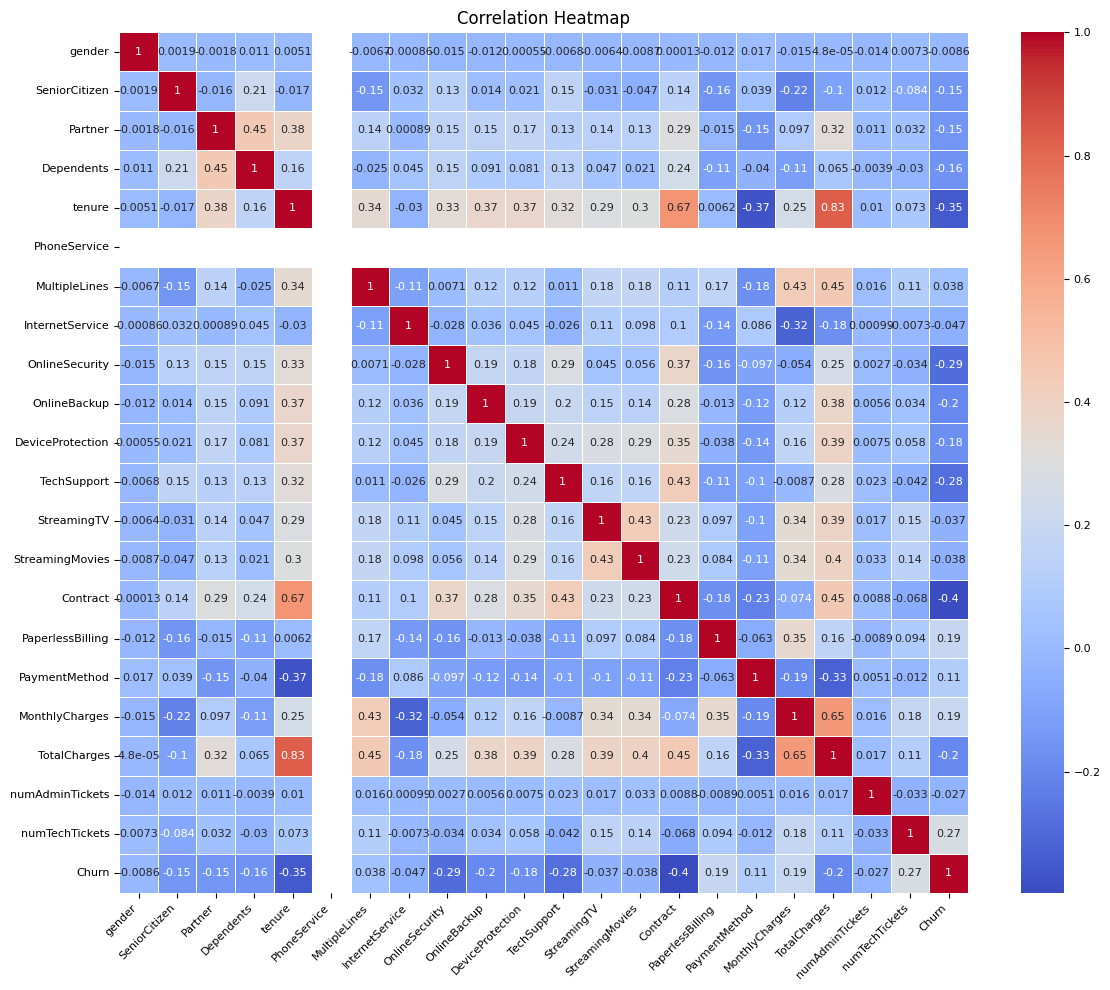

In [153]:
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax, annot_kws={"fontsize": 8})
ax.set_title('Correlation Heatmap')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=8)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()



- The correlation coefficients between the 'Churn' column and all other columns in the dataset, and then sort them in descending order. The resulting correlation values will indicate the strength and direction of the relationship between each variable and the 'Churn' column.

In [154]:
data.corr()['Churn'].sort_values(ascending = False)

Churn               1.00
numTechTickets      0.27
MonthlyCharges      0.19
PaperlessBilling    0.19
PaymentMethod       0.11
MultipleLines       0.04
gender             -0.01
numAdminTickets    -0.03
StreamingTV        -0.04
StreamingMovies    -0.04
InternetService    -0.05
Partner            -0.15
SeniorCitizen      -0.15
Dependents         -0.16
DeviceProtection   -0.18
OnlineBackup       -0.20
TotalCharges       -0.20
TechSupport        -0.28
OnlineSecurity     -0.29
tenure             -0.35
Contract           -0.40
PhoneService         NaN
Name: Churn, dtype: float64

- <b><h3> Featuer Selection </b>
 + split the data into training and testing sets.

In [155]:
X = data.drop(['Churn', 'TotalCharges'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [156]:
#(Rows,columns)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (4930, 20)
Shape of X_test: (2113, 20)


In [157]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of y_train: (4930,)
Shape of y_test: (2113,)


- <b><h2> Building Machine learning model</b>

- <h3><b> LazyClassifier </h3></b>

  + The LazyClassifier is a wrapper class that allows you to quickly test and compare multiple classification models with minimal code.
  + Help determine the best classification algorithms for data.

In [158]:
!pip install lazypredict


In [159]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the model performance
print(models)


100%|██████████| 29/29 [00:14<00:00,  1.99it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.75               0.78     0.78      0.76   
LGBMClassifier                     0.84               0.78     0.78      0.84   
GaussianNB                         0.78               0.78     0.78      0.79   
XGBClassifier                      0.83               0.78     0.78      0.83   
BernoulliNB                        0.77               0.78     0.78      0.78   
AdaBoostClassifier                 0.83               0.77     0.77      0.83   
SVC                                0.84               0.77     0.77      0.83   
LogisticRegression                 0.83               0.77     0.77      0.83   
SGDClassifier                      0.81               0.76     0.76      0.81   
LinearSVC                          0.83               0.76     0.76      0.82   
CalibratedClassifierCV      

<h3><b> Depending on the LazyClassifier, RandomForestClassifier and LGBMClassifier have the highest accuracy.</b></h3>

- <h3> <b>Random Forest Classifier


In [160]:
# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier for 100 cycles
for i in range(100):
    rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_predR = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_predR)
print("Accuracy:", accuracy)

# Perform cross-validation on the training data
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores))
print("Accuracy Standard Deviation:", np.std(cv_scores))


Accuracy: 0.828679602460956
Cross-Validation Scores: [0.86004057 0.79716024 0.82352941 0.83975659 0.81947262 0.831643
 0.81947262 0.8296146  0.81947262 0.80933063]
Average Accuracy: 0.8249492900608519
Accuracy Standard Deviation: 0.01620307540246776


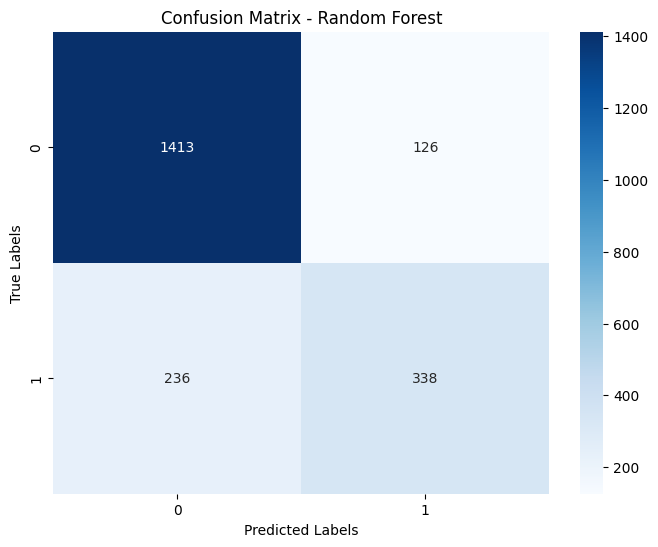

In [161]:
# Confusion matrix for the random forest
cm_random_forest = confusion_matrix(y_test, y_predR)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_random_forest, annot=True, fmt=".0f", cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



- <h3> <b>Lazy Classifier

In [162]:
# Create the LGBMClassifier
lgbm_classifier = LGBMClassifier()

# Fit the classifier to the training data
lgbm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_predL = lgbm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_predL)
print("Accuracy:", accuracy)


Accuracy: 0.8376715570279224


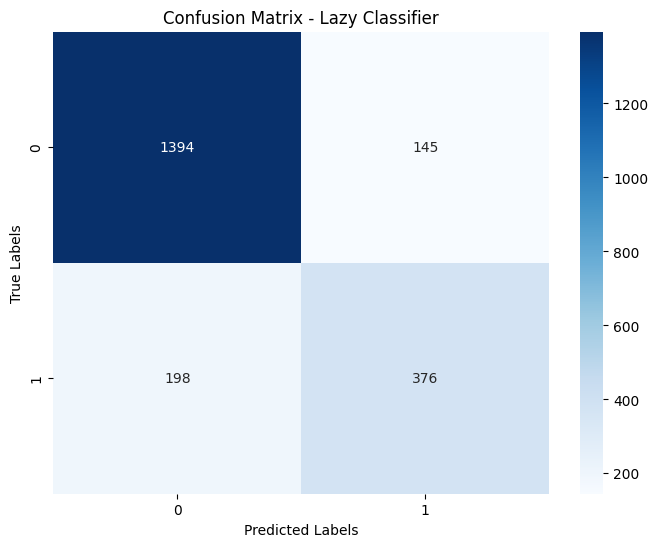

In [163]:
# Confusion matrix
cm_algorithm1 = confusion_matrix(y_test, y_predL)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_algorithm1, annot=True, fmt=".0f", cmap='Blues')
plt.title('Confusion Matrix - Lazy Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


<b><h2>Conclusion :

  The best classification algorithm for predicting churn is Lazy Classifier with an accuracy of about 84%.